# LINEAR REGRESSION
### IFCE - Course by Marcos Machado & Ivaldo Tributino

### What Is Regression?

<img src="images/wordcloud.png" style="width:500px;height:300px;">

* **Regression searches for relationships among variables.** For example, in the data set we are going to work on, we get the profit from the food trucks and the population of the cities where the food truck is working on. We try to understand how the foodtrucks' profit depend on (are explained by) the city population.

* Similarly, you can try to establish a mathematical dependence of the prices of houses on their areas, numbers of bedrooms, distances to the city center, and so on.

* Generally, in regression analysis, you usually consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that (at least) one of the features depends on the others, then you try to establish a relation among them.

* In other words, you need to find a function that maps some features or variables to others sufficiently well.

* **The dependent features are called the dependent variables, outputs, target or responses. The independent features are called the independent variables, inputs, or predictors.**

* It is a common practice to denote the outputs with `$y$` and inputs with `$x$`. If there are two or more independent variables, they can be represented as the vector `$x = (x_1, ..., x_n)$`, where `$n$` is the number of inputs.

**Regressao Linear:**
    * Explora a relacao entre variaveis.
    * Estabelece a dependencia matematica entre variaveis dependentes e independentes.
    * Pode ser aplicada em diferentes cenarios e areas.

In [1]:
#This piece of code is basically importing libraries and packs that we will use!
#Essa celula importa os pacotes que serao utilizados
%matplotlib inline
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **1) Linear regression with one variable**
### Lets explore concepts and definitions through the aplication of an example - Linear Regression with one variable. Data file that will be use is "ex1data1.txt" and it has two information: city population and foodtruck profits.
### Vamos explorar os conceitos e definicoes atraves da aplicacao de um exemplo - Regressao Linear com uma variavel. O arquivo de dados que vamos utilizar tem duas informacoes: populacao da cidade e os lucros dos foodtrucks que nelas estao.

In [2]:
# Import dataset and print in screen
# Importando os dados e imprimindo na tela
datafile = 'data/ex1data1.txt'
df = pandas.read_table(datafile, delimiter=',', names=('city_population', 'foodTruck_profit'))
df.head()

,city_population,foodTruck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 0.98, 'This is the dataset presented in the "ex1data1.txt" text file!')

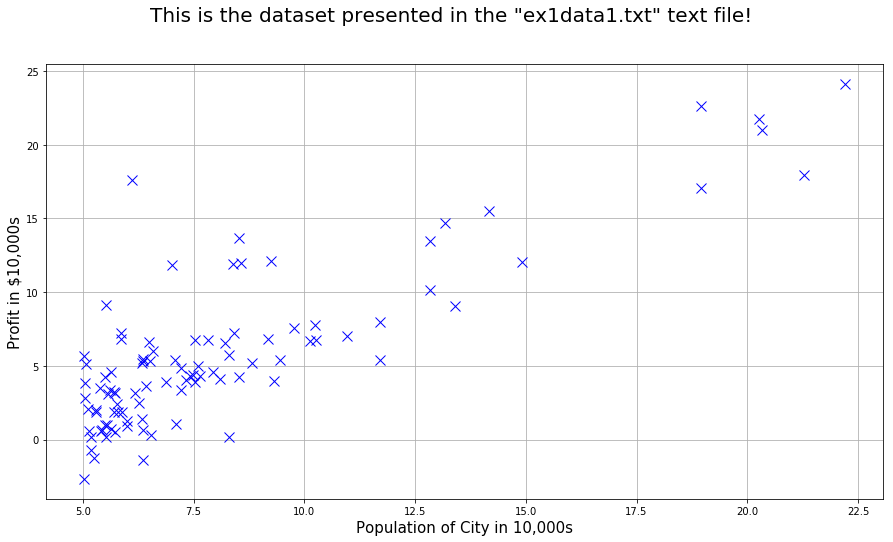

In [3]:
# Plotting the data to see what it looks like!
# Vamos observar as observacoes/exemplos num grafico em duas dimensoes!
X = df['city_population']
y = df['foodTruck_profit']
plt.figure(figsize=(15,8))
plt.plot(X,y,'bx',markersize=10)
plt.grid(True)
plt.ylabel('Profit in $10,000s', fontsize=15)
plt.xlabel('Population of City in 10,000s', fontsize=15)
plt.suptitle('This is the dataset presented in the "ex1data1.txt" text file!', fontsize=20)


# Problem Formulation

* **Independent variable:** $x^{(i)} = (x^{(i)}_1, ...,x^{(i)}_n)$;
* **dependent variable:** $y^{(i)} = (y^{(i)}_1, ...,y^{(i)}_n) $; 
* **Prediction:** $\widehat{y}^{(i)}=\theta_0 + \theta_1 x^i$, where $\theta_0, \theta_1$ are the regression coefficients.

Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with $\theta_0, \theta_1,$. 
**Regressao Linear calcula os estimadores $\theta$, coeficientes na equacao de regressao.**

The differences $|y^{(i)}-\widehat{y}^{(i)}|$ for all observations `i = 1, …, m` are called the residuals. Regression is about determining the best predicted weights, that is the weights corresponding to the smallest residuals.
**As diferencas entre os valores observados e preditores sao chamados de residuos. O que queremos e um residual pequeno.**

To get the best weights, you usually minimize the sum of squared residuals for all observations `i = 1, …, m`: 
**(Para obter os melhores estimadores $\theta$, geralmente os algorithms tem por objetivo minimizar a funcao de soma dos residuos ao quadrado(?)).**

# $$
\underset{\theta_0, \theta_1}{\text{minimize}} \frac{1}{2m}\sum^m_{i=0}(y^{(i)}-\widehat{y}^{(i)})^2
$$


<img src="images/regression.png" style="width:300px;height:300px;">


Let's define:

- X := Matrix m x 2, where 1 column is a array of 1 and the second column is df.foodTruck_profit
- y := `df['foodTruck_profit']`, than $y[i] = y^{(i)}$
- $\theta = (\theta_0, \theta_1)$
- $\widehat{y} := X * \theta$, matrix multiplication

In [4]:
X = np.matrix(df.city_population)
X = np.insert(X, 0, 1, axis=0)
X = np.transpose(X)

y = np.array(df.foodTruck_profit)
y = y.reshape(y.shape[0],-1)

# Our y_hat is going to be a function with input beta
# y_chapeu e uma funcao cominput beta
def y_hat(X,theta): #Linear hypothesis function
    return np.dot(X,theta)

### Now let's define the function: $ J:R^2\rightarrow R,$ define by

## $$
J(\theta_0,\theta_1) := \frac{1}{2m}\left|\widehat{y} - y\right|^2,
$$ 

### where $|a| := \sqrt{a_1^2 + ... + a_m^2}$.

## Gradient Descent

* `Gradient descent` is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. If, instead, one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent. Gradient descent was originally proposed by Cauchy in 1847. **Gradiente Descendente - e um metodo iterativo para encontrar o minimo de uma funcao. A cada iteracao um passo e dado em uma direcao (que pode ser encorajada ou retificada) em rumo ao minimo.**


### **Definition:** repeat until convergence / **Definicao do algoritmo:** repetir ate encontrar a convergencia

$$
\theta_j := \theta_j -\alpha\frac{\partial}{\partial \theta_j} J(\theta_0,\theta_1), \forall j\in \{0,1\}
$$, where

- $\alpha$ is the learning rate which basically defines how big the steps are during the descent

- $j = 0, 1$ represents the feature index number


## Understanding Gradient Descent

* In this case (Initialization in point **A**) it would be a positive slope and since $\alpha$ is a positive real number the overall term $-\alpha\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1)$ would be negative. This means the value of $\beta_1$ will be decreased in magnitude as shown by the arrows. **Um slope positivo quando iniciado no ponto A e negativo quando algoritmo e iniciado no ponto B.**
 
* Similary, if the initialization was at point **B**, then the slope of the line would be negative and then update term would be positive leading to increase in the value of $\theta_1$ as shown in the plot. So, no matter where the $\theta_1$ is initialized, the algorithm ensures that parameter is updated in the right direction towards the minima, given proper value for $\alpha$ is chosen.**Nao importa onde o algoritmo inicie, a cada iteracao uma aproximacao do minimo da funcao e realizada.**

* This is intuitive because that is exactly what is needed for minimizing the cost function. The term $\alpha$, as it can be seen from the equation will determine the magnitude of the update term, $-\alpha\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1)$ i.e. if the value is higher the steps of update would be proportionally larger. **Alfa e a taxa de aprendizagem (um hyperparameter), que determina a magnitude do update dado em busca do minimo.**

<img src="images/gradient.png" style="width:450px;height:380px;">


## Computing the cost $J(\theta)$ /  Calculando o custo $J(\theta)$

In [5]:
initial_theta = np.zeros((2,1))

def computeCost(X,y,theta): #Cost function
    """
    theta_start is an n-dimensional vector of initial theta guess
    X is matrix with n-columns and m-rows
    y is a matrix with m-rows and 1 column
    theta is a array with n-rows and 1 column
    """
    m = len(y)
    return float((1./(2*m)) * np.dot((y_hat(X, theta)-y).T,(y_hat(X, theta)-y)))

computeCost(X,y, initial_theta)

32.07273387745567

## Gradient descent


In order to implement this algorithm, we have to work out what is the partial derivative term on the right hand side. We have:

\begin{align}
\frac{\partial}{\partial \theta_j} J(\theta) & = \frac{1}{2m}\frac{\partial}{\partial \theta_j}\sum^m_{i=0}(\widehat{y}^{(i)}-y^{(i)})^2 \\
& = \frac{1}{m}\sum^m_{i=0}(\widehat{y}^{(i)}-y^{(i)})\frac{\partial}{\partial \theta_j}\left(\sum^n_{l=0}\theta_l x_l^{(i)}\right) \\
& = \frac{1}{m}\sum^m_{i=0}(\widehat{y}^{(i)}-y^{(i)})x^{(i)}_j \\
\end{align}

So, we have 

$$
\theta_j = \theta_j -\alpha\frac{1}{m}\sum^m_{i=0}(\widehat{y}^{(i)}-y^{(i)})x^{(i)}_j, \forall j\in \{0,1\},
$$ 

This is equal to

$$
\theta_j = \theta_j -\alpha\frac{1}{m}X^T*(\widehat{y}^{(i)}-y^{(i)}).
$$




In [6]:
# The following functions are going to implement the gradient descent.
# As funcoes abaixo vao definit a implementacao do gradiente descende.
def descendGradient(X, y, theta, alpha, interaction = 1500):
    """
    theta_start is an n-dimensional vector of initial theta guess
    X is matrix with n-columns and m-rows
    theta is a array with n-rows and 1 column
    alpha is the learning rate 
    i is the iteration
    """
    m = len(y)
    jvec = {} #Used to plot cost as function of iteration
    thetahistory = {} #dictinary, where key is the interaction and value is theta
    thetahistory[0] = theta
    jvec[0] = computeCost(X,y,theta)
    tmtheta = theta

    for i in range(interaction):
        tmtheta = tmtheta -(alpha/m)*np.dot(X.T,(y_hat(X, tmtheta)-y))
        jvec[i+1] = computeCost(X,y,tmtheta)
        thetahistory[i+1] = tmtheta
    return thetahistory[interaction], thetahistory, jvec 

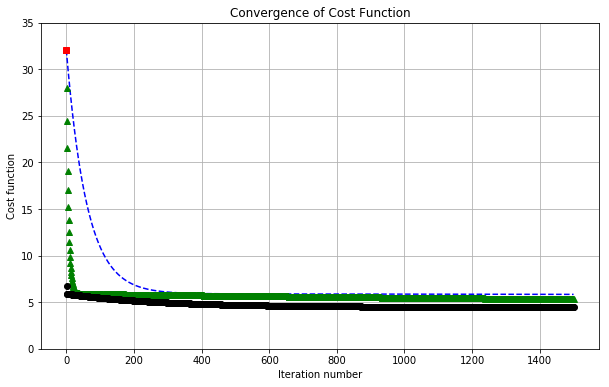

In [7]:
# Actually run gradient descent to get the best-fit theta values, AND, Plot the convergence of the 
# cost function for differents alphas.
# Rodar o codigo para calcular o gradiente descende e plotar um grafico do custo para cada numero de iteracoes.

#Plot the convergence of the cost function for differents alphas
def plotConvergence(jvec, style):
    plt.plot(range(len(jvec)),jvec.values(),style)
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
#     dummy = plt.xlim([-0.05*iterations,1.05*iterations])

alphas = [ 0.0001, 0.001,0.01, 0.1]
styles = ['b--', 'g^', 'ko','rs']

plt.figure(figsize=(10,6))   
for alpha, style in zip(alphas, styles) :
    theta, thetahistory, jvec = descendGradient(X,y, initial_theta, alpha)
    plotConvergence(jvec, style)
    dummy = plt.ylim([0,35])

### We can see that alpha can be bad if it's too big or too small for different reasons; if alpha is too large, J may differ, on the other hand, if alpha is too small, it may take a long time to get closer to the minimum. So let's choose the best alpha which, in our case, is 0.01.

In [8]:
theta, thetahistory, jvec = descendGradient(X,y, initial_theta, 0.01)

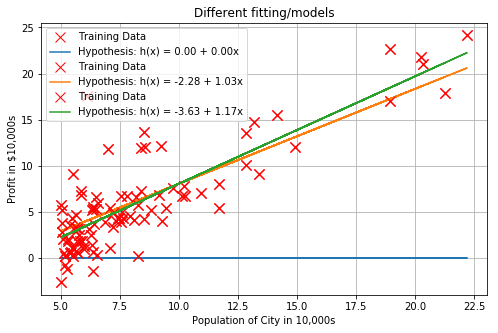

In [9]:
# label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(thetahistory[3].item(0),thetahistory[3].item(1)
interac = [0,500,1500]  
styles = ['b-', 'y-', 'g-']    
    
plt.figure(figsize=(8,5))
for (i, style) in zip(interac, styles):
    
    plt.plot(X[:,1], y[:,0],'rx',markersize=10,label='Training Data')
    plt.plot(X[:,1],y_hat(X, thetahistory[i]), 
             label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(thetahistory[i].item(0),thetahistory[i].item(1)))
    plt.grid(True) #Always plot.grid true!
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.title("Different fitting/models")
    plt.legend() 

# Visualizing  $J(\theta)$
### source : https://github.com/kaleko/CourseraML

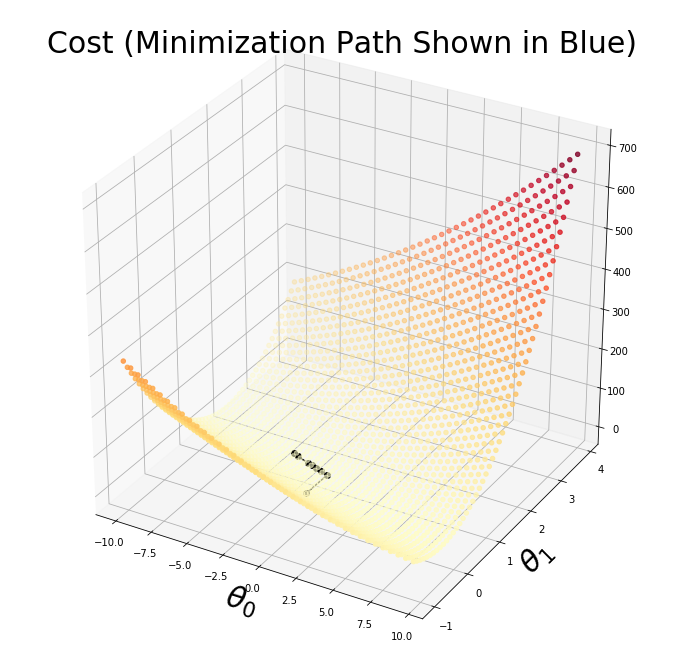

In [72]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))

ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(X,y, np.array([[david], [kaleko]])))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)

lista = [0,100, 200, 300, 400, 500, 1000, 1500]
theta_1 = [thetahistory[i].item(0) for i in lista]
theta_2 = [thetahistory[i].item(1) for i in lista]
cost = [jvec[i] for i in lista]
plt.plot(theta_1,theta_2,cost,'ko-')

plt.show()

# Linear Regression with multiple variables

In [73]:
# We will use another dataset "ex1data2.txt".
# Vamos utilizar outro banco de dados - Preco de casas, tamanho de casas e numero de quartos.
datafile_1 = 'data/ex1data2.txt'
df_1 = pandas.read_table(datafile_1, delimiter=',', names = ('house_sizes', '#bedrooms', 'house_price'))
df_1.head()

,house_sizes,#bedrooms,house_price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [74]:
# Checking the correlation among data
# Vamos visualizar a correlacao entre as variaveis
df_1.corr()

,house_sizes,#bedrooms,house_price
house_sizes,1.000000,0.559967,0.854988
#bedrooms,0.559967,1.000000,0.442261
house_price,0.854988,0.442261,1.000000


In [75]:
# Defining matrices and vectors to implement models.
# Definindo matrizes e vetores para implementar modelos.
X = np.matrix(df_1[['house_sizes', '#bedrooms']])
X = np.insert(X, 0, 1, axis=1)  

y = np.array(df_1.house_price)
y = y.reshape(y.shape[0],-1)

In [76]:
initial_theta = np.zeros((X.shape[1],1))
print("Note that our Cost is very high:" + " %0.2f" % float(computeCost(X,y, initial_theta)))

Note that our Cost is very high: 65591548106.46


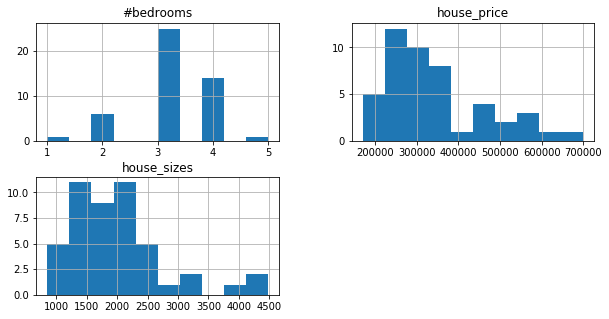

In [77]:
# Visualizing the frequency of the data in the file.
# Vamos visualizar os histogramas/frequencia dos dados presentes no arquivo.
df_1.hist(figsize = (10,5))
plt.show()

## Normalization

### Motivation

* Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. **Os valores variam bastante na escala, alguns algoritmos de ML funcionam melhor quando valores estao na mesma escala, por isso a necessidade de normalizar os dados presentes no arquivo.**

* Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it. Source: wikipedia **Outra motivacao e que o gradiente descende vai convergir muito mais rapido.**

* PS. This example that we are working on there is no normalization, then, the cost is going to infinity.

### Methods

There are many methods such as: 
- Min-max normalization
- Mean normalization
- Mean normalization
- Scaling to unit length
- Z-score normalization

Let's use the method Z-score Normalization below. For more information see (Normalization) (https://www.codecademy.com/articles/normalization).

## $$
X_{\text{norm}} = \frac{X - \mu}{\sigma},
$$ where $\mu = \frac{1}{m}\sum^m_{i=0}x^{(i)}$ and $\sigma = \sqrt{\frac{\sum^m_{i=0}(x^{(i)}-\mu)^2}{m-1}}$.

In [78]:
# Feature normalizing the columns (subtract by the mean, divide by the standard deviation).
# Subtrair pela media e dividir pelo desvio padrao.
# Store the mean and std for later use.
# Salvar dados para uso posterior.
# Note don't modify the original X matrix, use a copy.
# Observar que o original valor nao e modificado.
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

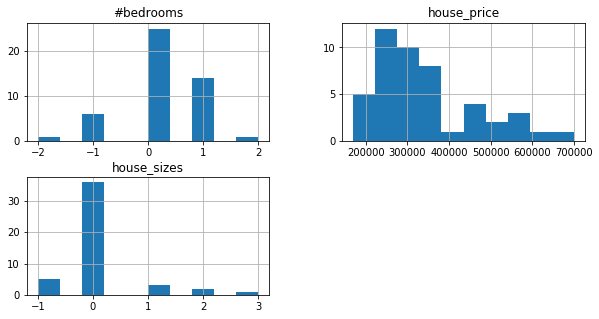

In [79]:
# New distributions after normalization.
# Novas distribuicoes, apos normalizacao.
df_norm = df_1.copy()

df_norm['house_sizes'] = Xnorm[:,1]
df_norm['#bedrooms'] = Xnorm[:,2]
df_norm.hist(figsize = (10,5))
plt.show()

Text(0, 0.5, 'Cost function')

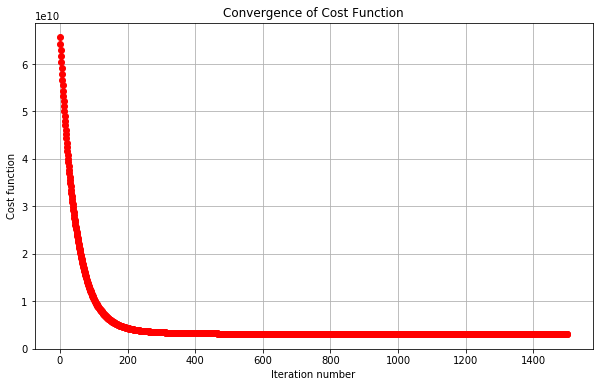

In [80]:
# Run gradient descent with multiple variables, initial theta still set to zeros
# (Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
# Rodar codigo do gradiente descende para o caso de multipla variaveis.
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,y,initial_theta, 0.01)

#Plot convergence of cost function:
plt.figure(figsize=(10,6))
plt.plot(range(len(jvec)),jvec.values(), 'ro')
plt.grid(True)
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")

# Proposed Exercise:
Create a Kaggle account and go over the kernel: https://www.kaggle.com/sudhirnl7/linear-regrssion-tutorial
Criar uma conta no kaggle e acompanhar o tutorial apresentado por https://www.kaggle.com/sudhirnl7/linear-regrssion-tutorial

##  Bibliography

- https://realpython.com/linear-regression-in-python/
- The Elements of Statistical Learning Data Mining, Inference, and Prediction
- https://github.com/kaleko/CourseraML
- https://machinelearningmedium.com/2017/08/15/gradient-descent/
- https://www.codecademy.com/articles/normalization